# Optimisation for Machine Learning

September 27, 2023

### Logistic
Contact: [Clement Royer](mailto:clement.royer@lamsade.dauphine.fr)
Lecture's web: [URL](https://www.lamsade.dauphine.fr/%7Ecroyer/teachOAA.html)
Examen: 60% (2h), dated December 13, 2023 10:00 AM - 12:00 PM
Project: 40%, during from October 6, 2023 to December 23, 2023

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

## GRADIENT METHODS AND CONVEX OPTIMIZATION

**Problem of interest**: $\min_{w \in \mathbb{R}^d} f(w)$ and $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is convex and differentiable.

When it is convex we don't have to worry about local minima, because the local minima is the global minima.

**Assumption**: $f$ belongs to $C^{1,1}_{L}$ functions, i.e. $f$ is convex and its gradient is $L$-Lipschitz continuous.
- $f$ is $C^1$ (continuously differentiable) at every point $w \in \mathbb{R}^d$, $\exists \nabla f(w) \in \mathbb{R}^d$ (gradient of $f$ at $w$) that represents how the function $f$ varies locally around $w$.
- The gradient mapping $\nabla f: \mathbb{R}^d \rightarrow \mathbb{R}^d, w \mapsto \nabla f(w)$ is $L$-Lipschitz continuous where $L > 0$ is the Lipschitz constant of $\nabla f$. This means that $\forall w, w' \in \mathbb{R}^d, \|\nabla f(w) - \nabla f(w')\| \leq L \|w - w'\|$. (At $L = 0$, $\nabla f$ is constant, i.e. $\nabla f(w) = \nabla f(w')$ for all $w, w' \in \mathbb{R}^d$.)

**Examples of $C^{1,1}_{L}$ functions**:
- Linear least squares: $f(w) = \frac{1}{2} \|Xw - y\|^2$ where $X \in \mathbb{R}^{n \times d}$ and $y \in \mathbb{R}^n$.
- Logistic regression objective function: $f(w) = \sum_{i=1}^n \log(1 + \exp(-y_i x_i^T w))$ where $x_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}$.
- Quadratic function: $f(w) = \frac{1}{2} w^T A w - b^T w$ where $A \in \mathbb{R}^{d \times d}$ and $b \in \mathbb{R}^d$.

**Remark**: $C^{1,1}_{L}$ assumption is a simplifying assumption that:
- Functions are not always $C^{1}$
- Functions/gradients are not always Lipschitz continuous on the whole space $\mathbb{R}^d$. $\rightarrow$ Possible to use local Lipschitz constants instead of global Lipschitz constants.

Sometimes $C^{1,1}_{L}$ are called $L$-smooth functions. $L$ is called the smoothness constant.

**Properties of $C^{1,1}_{L}$ functions**: If $f$ is $C^{1,1}_{L}$ convex then 

- [1] $\forall w, w' \in \mathbb{R}^d f(w') \leq f(w) + \nabla f(w)^T (w' - w) + \frac{L}{2} \|w' - w\|^2$ $\rightarrow$ Upper bound on $f(w')$ with a quadratic function of $w'$.
- [2] $\forall w, w' \in \mathbb{R}^d f(w') \geq f(w) + \nabla f(w)^T (w' - w)$ $\rightarrow$ Lower bound on $f(w')$ with a linear function of $w'$. (This is actually a characterization of convexity for $C^1$ functions.)

Toward gradient descent:
1. Suppose that we are at $w \in \mathbb{R}^d$ and we know $f(w)$ and $\nabla f(w)$.
2. If $\|\nabla f(w)\| = 0$ then $w$ is a global minimum of $f$ (because $f$ is convex).
3. When $\|\nabla f(w)\| \neq 0$, using (1) we can find $v$ such that: $f(w) + \nabla f(w)^T v + \frac{L}{2} \|v\|^2 < f(w)$ implying that $f(v) \leq f(w) + \nabla f(w)^T v + \frac{L}{2} \|v\|^2 < f(w)$.
4. We can then replace $w$ by $v$ and repeat the process until $\|\nabla f(w)\| = 0$.

### Gradient Descent

**Gradient descent algorithm**: $f$ is $C^{1,1}_{L}$ convex and differentiable.
1. Initialize $w_0 \in \mathbb{R}^d$.
2. For $k = 0, 1, \dots$:
    - Evaluate $f(w_k)$ and $\nabla f(w_k)$. If $\|\nabla f(w_k)\| = 0$ then stop. $\Longrightarrow$ Output $w_k$.
    - Choose a step size $\alpha_k > 0$.
    - Set $w_{k+1} = w_k - \alpha_k \nabla f(w_k)$.
    End For.

$w_{k+1} = w_k - \alpha_k \nabla f(w_k)$ is called the **gradient descent iteration**.

**Remark**: $f$ is $C^{1,1}_{L}$ convex and differentiable $\Longrightarrow$ $f$ is $C^1$ and convex $\Longrightarrow$ $f$ is convex $\Longrightarrow$ $f$ is $C^1$.

**At step 1**: In an implementation, the for loop is replaced by a while loop involving a convergence criterion and a budget of iterations.
- Convergence criterion: $\|\nabla f(w_k)\| < \epsilon$ for some $\epsilon > 0$.
- Budget of iterations: $k < k_{\max}$ for some $k_{\max} \in \mathbb{N}$.
$\Longrightarrow$ The algorithm stops when $\|\nabla f(w_k)\| < \epsilon$ or $k = k_{\max}$.
Budget of iterations is useful when the convergence criterion is not satisfied. It could be number of iterations, number of function evaluations, CPU time, etc.

In [5]:
# Visualisation of gradient descent
def plot_gradient_descent(f, grad_f, alpha, w0, max_iter=1000, eps=1e-6):
    w = w0
    w_list = [w]
    while np.linalg.norm(grad_f(w)) > eps and len(w_list) < max_iter:
        w = w - alpha * grad_f(w)
        w_list.append(w)
    w_list = np.array(w_list)
    plt.figure(figsize=(5, 5))
    plt.plot(w_list[:, 0], w_list[:, 1], 'o-', markersize=5, color='cyan')
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')
    plt.grid()
    plt.title('Gradient descent')
    plt.show()

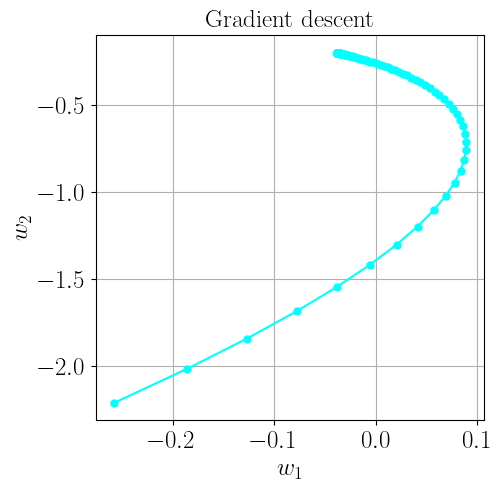

In [6]:
n = 100
d = 10
X = np.random.randn(n, d)
y = np.random.randn(n)
def f(w):
    return 0.5 * np.linalg.norm(X @ w - y) ** 2
def grad_f(w):
    return X.T @ (X @ w - y)
alpha = 0.001
w0 = np.random.randn(d)
plot_gradient_descent(f, grad_f, alpha, w0)

Other convergence criteria:
- $\| \nabla f(w_k) \| < \epsilon \| \nabla f(w_0) \|$ where $\epsilon$ is small tolerance/precision parameter. (e.g. $\epsilon = 10^{-6}$)
- $f(w_k) - \min_{w \in \mathbb{R}^d} f(w) < \epsilon$ where $\epsilon$ is small tolerance/precision parameter. Closed to the best possible objective. Most of the time the optimal value is unknown. But for the convex functions, we can provide theorical bounds on the cost of satisfying this condition.
- $\|w_k - w^*\| < \epsilon$ where $\epsilon$ is small tolerance/precision parameter, $w^* in \arg\min_{w \in \mathbb{R}^d} f(w)$ is the optimal solution.

**Remark**: In general the optimal solution is unknown. But for certain convex functions, we can provide theorical bounds on the cost of satisfying $\|w_k - w^*\| < \epsilon$.

**At second step** How we can choose $\alpha_k$?

One choice that works for $C^{1,1}_{L}$ functions is $\alpha_k = \frac{1}{L}$.
Proposition: Suppose that we are at iteration $k$ of gradient descent and $\| \nabla f(w_k) \| \neq 0$. Then, if $\alpha_k = \frac{1}{L}$, we have:
$$
f(w_k) - \alpha_k \|\nabla f(w_k)\|^2 \leq f(w_k) - \frac{1}{2L} \|\nabla f(w_k)\|^2 < f(w_{k})
$$

Proof **(PLEASE REDO THIS!)**:
Apply (1) with $v = w_k - \alpha \nabla f(w_k)$ and $w = w_k$:
$$
f(w_k) + \nabla f(w_k) \leq f(w_k) + \nabla f(w_k)^T (-\frac{1}{L} \nabla f(w_k)) + \frac{L}{2} \|-\frac{1}{L} \nabla f(w_k)\|^2 \\
= f(w_k) + \nabla f(w_k)^T(- \alpha \nabla f(w_k)) + \frac{L}{2}\|- \alpha_k \nabla f(w_k)\|^2 \\
= f(w_k) - \underbrace {\alpha_k \nabla f(w_k)^T \nabla f(w_k)}_{\|\nabla f(w_k)\|^2} + \frac{L}{2} \alpha_k^2 \|\nabla f(w_k)\|^2 \\
= f(w_k) - \alpha_k \|\nabla f(w_k)\|^2 + \frac{L}{2} \alpha_k^2 \|\nabla f(w_k)\|^2 \\
= f(w_k) - \frac{1}{L} \|\nabla f(w_k)\|^2 + \frac{L}{2} \times \frac{1}{L^2} \|\nabla f(w_k)\|^2 \\
= f(w_k) + [\frac{1}{L} - \frac{1}{2L}] \|\nabla f(w_k)\|^2 \\
= f(w_k) - \frac{1}{2L} \|\nabla f(w_k)\|^2 < f(w_k)
$$

More general result: For any $\alpha_k \in (0, \frac{2}{L})$, we have:
$$
f(w_k) - \alpha_k \nabla f(w_k) < f(w_k)
$$

**Remark**:
- This suggests a problem dependent choice of $\alpha_k$.
- Requires knowledge of Lipschitz constant $L$.


QUESTION: Under our assumptions, what can we prove about the algorithm?

**Theorem**: Suppose that $f$ is $C^{1,1}_{L}$ convex and differentiable. Then, for any $\alpha_k = \frac{1}{L}$, we have:
1. Convergence rate: For any $k \geq 1$, after $k$ iterations of gradient descent, we have: $$f(w_k) - \min_{w \in \mathbb{R}^d} f(w) \leq \mathcal{O}(\frac{1}{k})$$
2. Complexity bound: For any $\epsilon > 0$, GD reaches an iterate $w_k$ such that $f(w_k) - \min_{w \in \mathbb{R}^d} f(w) \leq \epsilon$ in at most $\mathcal{O}(\frac{1}{\epsilon})$ iterations. The cost of satisfying $f(w_k) - \min_{w \in \mathbb{R}^d} f(w) \leq \epsilon$ is $\mathcal{O}(\frac{1}{\epsilon})$ iterations.

$\mathcal{O}$ constant is dependent on $w_0$ and $L$, distance between $w_0$ and $w^*$.
$\leq$ signify that it is a worst case 

Convergence rates and complexity bounds are used as guidance or indicators of the performance of an algorithm. They can be closed to practical performance or simple examples and these rates/bounds are attained in some (pathological) cases.

Two ways to get better rates/bounds:
- Add more assumptions on $f$.
- Change the algorithm.

### Strongly Convex Functions

**Definition**: $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is $\mu$-strongly convex if $\forall v, w \in \mathbb{R}^d, f(v) \geq f(w) + \nabla f(w)^T (v - w) + \frac{\mu}{2} \|v - w\|^2$ where $\mu > 0$ is the strong convexity constant of $f$.

The part $\frac{\mu}{2} \|v - w\|^2$ is a quadratic term compared to the linear term $\nabla f(w)^T (v - w)$.
$f(v) \geq f(w) + \nabla f(w)^T (v - w)$ is corresponding to the linear approximation of $f$ at $w$ ([2] in $C^{1,1}_{L}$ functions).

**NB**: $f$ is $\mu$-strongly convex $\Longrightarrow$ $f$ is convex

**Property**:
If $f$ is $\mu$-strongly convex then it has a unique global minimum, which is the unique solution of $\nabla f(w) = 0$.

**Consequence of Gradient Descent**: Suppose that $f \in F^{1,1}_{L, \mu}$, i.e. $f$ is $C^{1,1}_{L}$ convex and differentiable and $\mu$-strongly convex $\Longrightarrow$ $L \geq \mu$. Then running gradient descent with $\alpha_k = \frac{1}{L}$ give the following guarantee:
1. Convergence rate: For any $k \geq 1$, after $k$ iterations of gradient descent, we have: $$\underbrace{\|w_k - w^*\|^2}_{\text{distance to } w^*} \leq \underbrace{(1 - \frac{\mu}{L})^k}_{\text{convergence rate}} \underbrace{\|w_0 - w^*\|^2}_{\text{distance from } w_0 \text{ to } w^*}$$

This is called a linear rate of convergence or an exponential rate of convergence. $1 - \frac{\mu}{L}$ is called the convergence factor.
Better than the results for convex functions.
- Stronger criterion: $\|w_k - w^*\| < \epsilon$ instead of $f(w_k) - \min_{w \in \mathbb{R}^d} f(w) \leq \epsilon$.
- Better rate $(1 - \frac{\mu}{L})^k$ goes to $0$ faster than $\frac{1}{k}$.
In practice, GD is faster on strongly convex functions than on convex functions. For certain strongly convex functions, we can define a better step size than $\alpha_k = \frac{1}{L}$. Example for quadratic functions: $\alpha_k = \frac{2}{\mu + L}$.

2. Complexity bound: $\|w_k - w^*\| < \epsilon$ holds after at most $\mathcal{O}(\frac{L}{\mu} \log(\frac{1}{\epsilon}))$ iterations. $\log(\frac{1}{\epsilon}) < \frac{1}{\epsilon}$ for $\epsilon$ small enough. $\mathcal{O}(\frac{L}{\mu} \log(\frac{1}{\epsilon}))$ is better than $\mathcal{O}(\frac{1}{\epsilon})$ for convex functions.
3. Acceleration:
Is there an algorithm that has better guarantees than GD while doing the same amount of works per iteration? (i.e same number of function evaluations and gradient evaluations per iteration)
**Recall:** GD iteration: $\forall k \geq 0, w_{k+1} = w_k - \alpha_k \nabla f(w_k)$ where $\alpha_k = \frac{1}{L}$.
To define the step size $w_{k+1} = w_k - \alpha_k \nabla f(w_k)$, we use the information related to $w_k$ and ignore the information related to $w_{k-1}$, $w_{k-2}$, etc. $\Longrightarrow$ We can do better by using more information.

#### Polyak's Heavy Ball Method 1964
Heavy Ball Method/Gradient Descend with Momentum
$$
\forall k \geq 0, w_{k+1} = w_k - \alpha_k \nabla f(w_k) + \underbrace{\beta_k (\underbrace{w_k - w_{k-1}}_{\text{previous step}})}_{\text{momentum term}}
$$
with $\beta_0 = 0$ and $\beta_k \geq 0$ for $k \geq 1$.

- This is optimal or strongly convex quadratic functions (better than Gb and cannot do better with only 1 gradient evaluation per iteration).
Convergence rate $(1 - \sqrt{\frac{\mu}{L}})^k \leq \underbrace{(1 - \frac{\mu}{L})^k}_{\text{GD}}$.
- But Heavy Ball Method can fail on strongly convex functions that are not quadratic.

#### Nesterov's Accelerated Gradient Method 1983
Accelerated Gradient/Nesterov's Method:
$$
\forall k \geq 0, w_{k+1} = w_k - \alpha_k \nabla f(w_k) + \beta_k (w_k - w_{k-1}) + \beta_k (w_k - w_{k-1})
$$
The difference with Heavy Ball Method is that:
- First compute $w_k - \beta_k (w_k - w_{k-1})$.
- Then do a gradient step from $w_k - \beta_k (w_k - w_{k-1})$.

**Guarantees for Nesterov's Method**:
1. If $f$ is $F^{1,1}_{L,\mu}$, then for any $\alpha_k = \frac{1}{L}$ and $\beta_k = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$, we have: $${\|w_k - w^*\|}_{\forall k \geq 1} \leq \underbrace{(1 - \frac{\mu}{L})^k}_{\text{convergence rate}} \underbrace{\|w_0 - w^*\|}_{\text{distance from } w_0 \text{ to } w^*}$$ Complexity bound: $\|w_k - w^*\| < \epsilon$ holds after at most $\mathcal{O}(\sqrt{\frac{L}{\mu}} \log(\frac{1}{\epsilon}))$ iterations.
2. If $f \in F^{1,1}_{L,\mu}$ and convex: Set $\alpha_k = \frac{1}{L}$ and $\underbrace{\beta_k = \frac{t_{k-1}}{t_{k+1}}}_{\text{Independent of problem}} where t_0 = 0$ and $t_1 = 1$ and $t_{k+1} = \frac{1}{2} (1 + \sqrt{1 + 4 t_k^2})$ for $k \geq 1$.